# To predict whether a person will have diabetes or not.¶

In [1]:
## importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## ignore warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Loading the data

data = pd.read_csv('diabetes1.csv') 

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Basic checks
# EDA 

# Data preprocessing

In [6]:
# Checking null values
# Outliers
# Balancing the data
# Scaling
# Dropping irrelevant columns 
# Encoding 

In [7]:
# Checking the null values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


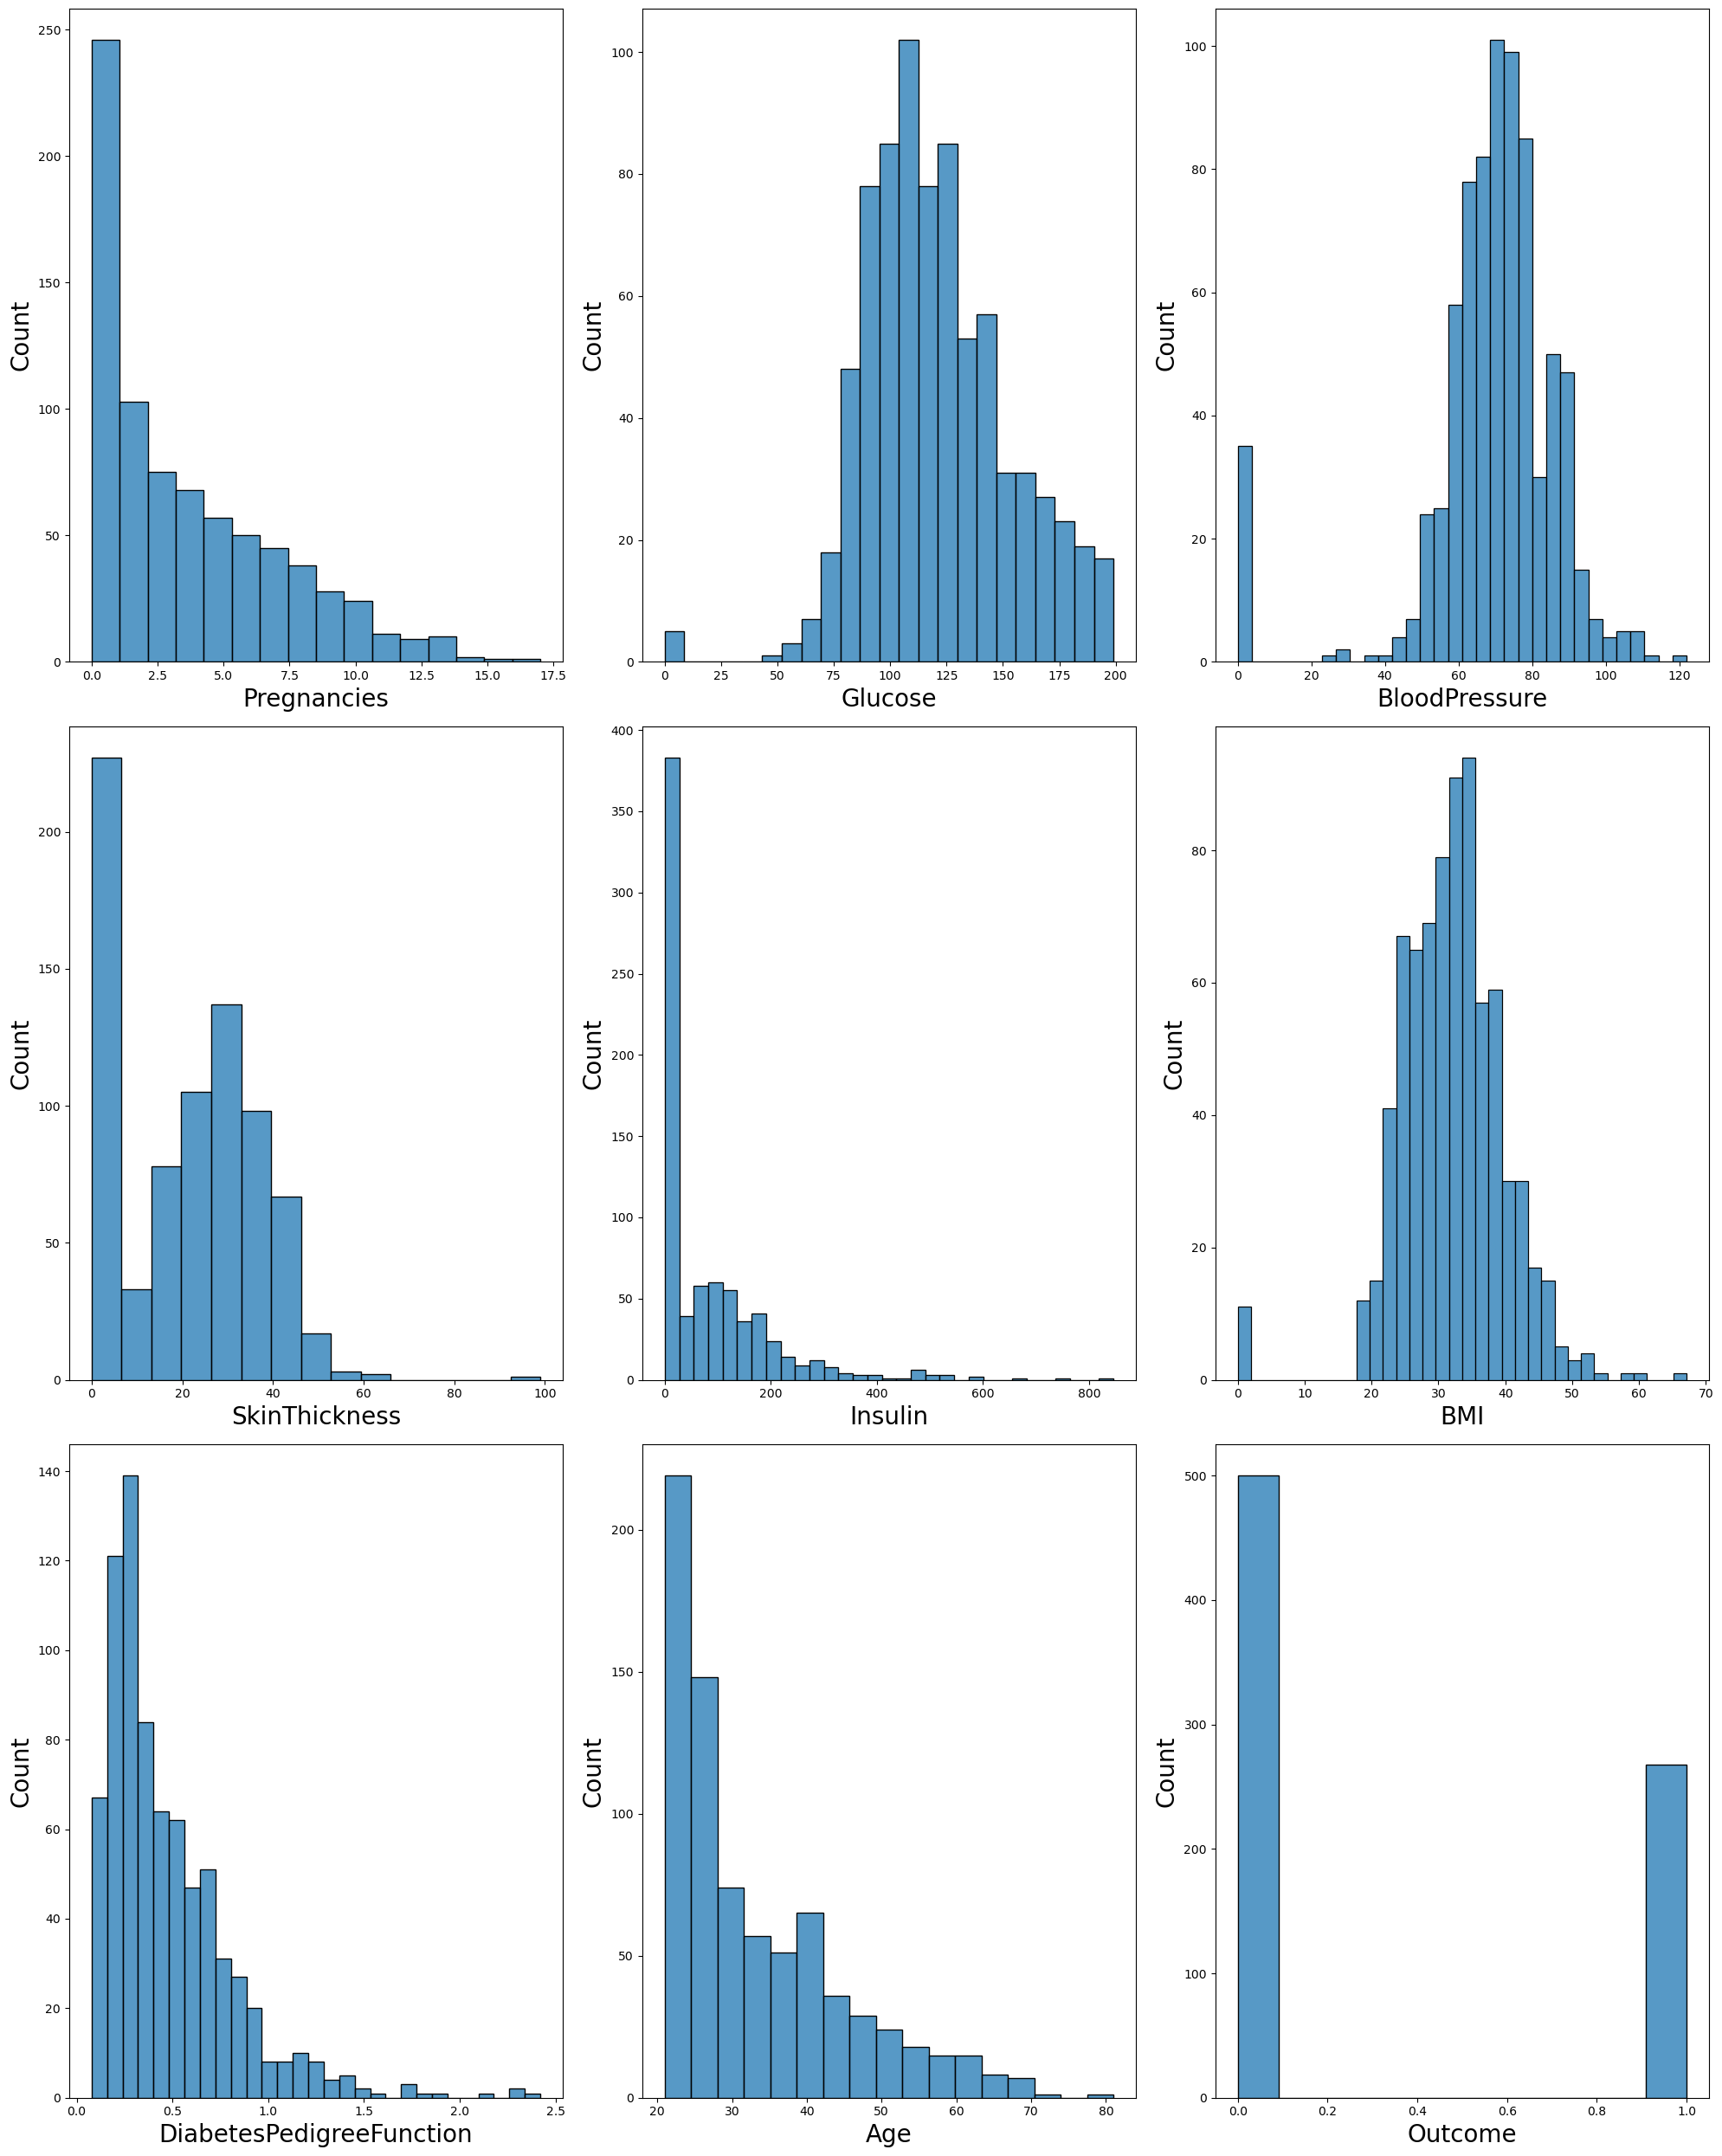

In [9]:
plt.figure(figsize=(20,25),facecolor='white') 
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
data.loc[data['Glucose']==0,'Glucose'] = np.median(data['Glucose'])

In [11]:
data.loc[data['BloodPressure']==0,'BloodPressure'] = np.median(data['BloodPressure'])
data.loc[data['SkinThickness']==0,'SkinThickness'] = np.median(data['SkinThickness'])
data.loc[data['Insulin']==0,'Insulin'] = np.median(data['Insulin'])
data.loc[data['BMI']==0,'BMI'] = np.median(data['BMI'])

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


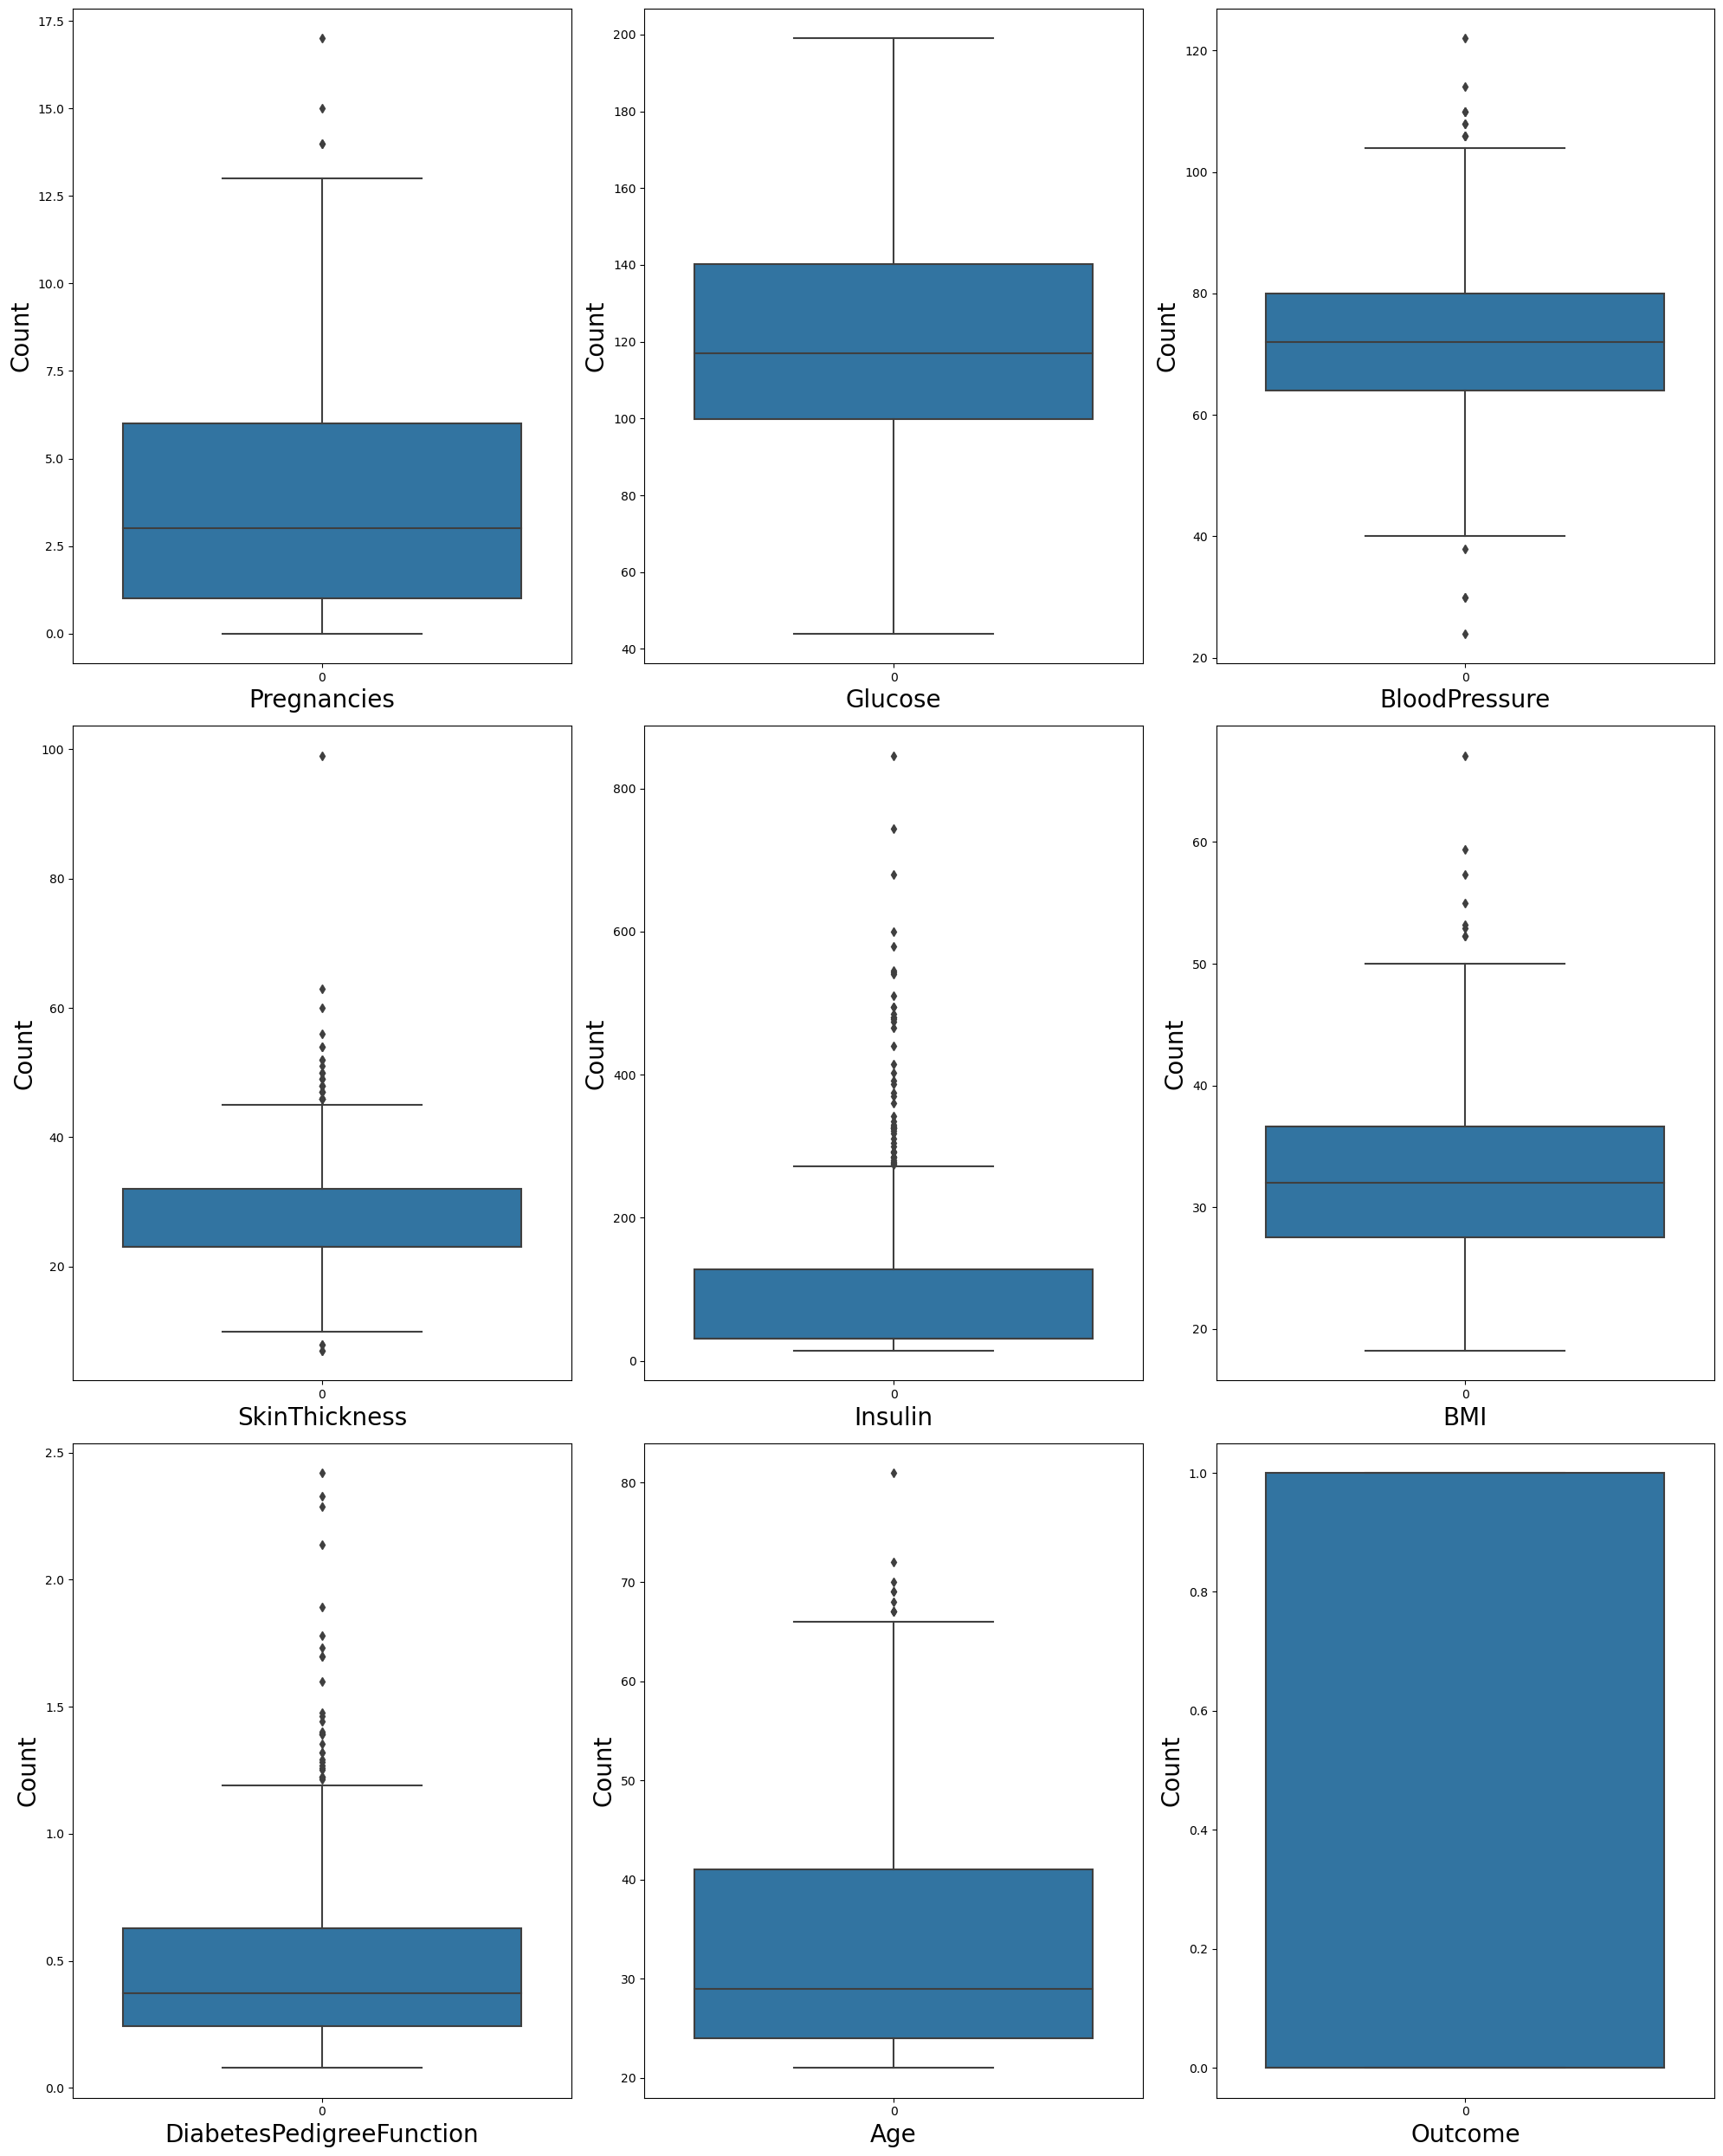

In [13]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
## Scaling

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

scaled_data = scaler.fit_transform(data.drop(['Pregnancies','Outcome'],axis=1)) 

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
data1 = pd.DataFrame(scaled_data,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [17]:
data1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [18]:
data2 = data[['Pregnancies','Outcome']] 

In [19]:
data_new = pd.concat([data1,data2],axis=1)

In [20]:
data_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


## Splitting the data

In [21]:
X = data_new.iloc[:,:-1]
# X = data.drop('Outcome',axis=1)
y = data.Outcome

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


## Model creation

In [24]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [25]:
## train acc 

from sklearn.metrics import accuracy_score

y_train_pred = logistic.predict(x_train)

accuracy_score(y_train,y_train_pred) 

0.762214983713355

In [26]:
## test acc

y_pred = logistic.predict(x_test) 

accuracy_score(y_test,y_pred) 

0.7857142857142857

In [27]:
# prediction 

y_pred = logistic.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [41]:
# probability values

probability_values = logistic.predict_proba(x_test)
probability_values

array([[0.71745211, 0.28254789],
       [0.79251627, 0.20748373],
       [0.85708585, 0.14291415],
       [0.76003086, 0.23996914],
       [0.51079245, 0.48920755],
       [0.59021154, 0.40978846],
       [0.96889928, 0.03110072],
       [0.65550393, 0.34449607],
       [0.48027987, 0.51972013],
       [0.32983021, 0.67016979],
       [0.70076715, 0.29923285],
       [0.16084943, 0.83915057],
       [0.61657343, 0.38342657],
       [0.71233867, 0.28766133],
       [0.89556253, 0.10443747],
       [0.65833793, 0.34166207],
       [0.84741815, 0.15258185],
       [0.8837805 , 0.1162195 ],
       [0.35054498, 0.64945502],
       [0.54950514, 0.45049486],
       [0.76451897, 0.23548103],
       [0.88647909, 0.11352091],
       [0.47052066, 0.52947934],
       [0.87956006, 0.12043994],
       [0.46646264, 0.53353736],
       [0.17744738, 0.82255262],
       [0.83440718, 0.16559282],
       [0.93745093, 0.06254907],
       [0.73399352, 0.26600648],
       [0.85539364, 0.14460636],
       [0.

## Evaluation

### Accuracy score

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score

In [30]:
accuracy_score(y_test,y_pred) 

0.7857142857142857

In [31]:
confusion_matrix(y_test,y_pred) 

array([[87, 12],
       [21, 34]], dtype=int64)

In [32]:
precision_score(y_test,y_pred) 

0.7391304347826086

In [33]:
recall_score(y_test,y_pred) 

0.6181818181818182

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [35]:
confusion_matrix(y_test,y_pred) 

array([[87, 12],
       [21, 34]], dtype=int64)

In [36]:
roc_auc_score(y_test,y_pred) 

0.7484848484848484

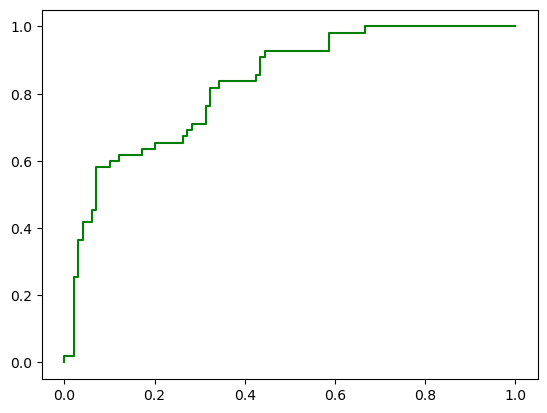

In [47]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve 

y_predict = logistic.predict_proba(x_test)[:,1] 
fpr,tpr,thresholds = roc_curve(y_test,y_predict) 
plt.plot(fpr,tpr,color='green') 
plt.show() 

In [45]:
thresholds

array([1.92897137, 0.92897137, 0.83915057, 0.74135707, 0.73538048,
       0.67710744, 0.67531871, 0.67034775, 0.66378519, 0.65681884,
       0.65591965, 0.56322977, 0.53353736, 0.53299127, 0.51972013,
       0.51005006, 0.48510665, 0.47472019, 0.45755784, 0.45049486,
       0.40033863, 0.39821374, 0.38375396, 0.38342657, 0.37563537,
       0.37019262, 0.34449607, 0.33483569, 0.33394268, 0.3149445 ,
       0.3086283 , 0.29923285, 0.27368176, 0.27069795, 0.2706138 ,
       0.25266858, 0.2524786 , 0.24501227, 0.16957697, 0.16571341,
       0.142497  , 0.14139571, 0.02943266])

In [38]:
## task
# iris dataset , multiclass implementation.

In [48]:
iris = pd.read_csv('Iris.csv') 
iris 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
# Domain analysis
# Basic checks
# EDA
# 

## Data preprocessing

In [50]:
iris 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
iris.drop('Id',axis=1,inplace=True) 

In [53]:
iris 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
## Spliting the data

X = iris.drop('Species',axis=1)
y = iris.Species

In [60]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

y = lc.fit_transform(y) 

In [61]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
### train,test splitiing
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42) 

In [65]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Model implementation

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train1,y_train1)

LogisticRegression()

In [67]:
y_prediction = model.predict(x_test1)

In [68]:
y_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [69]:
y_test1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Model evaluation

In [72]:
accuracy_score(y_test1,y_prediction)

1.0

In [73]:
confusion_matrix(y_test1,y_prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [76]:
pd.crosstab(y_test1,y_prediction)

col_0,0,1,2
row_0,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [75]:
print(classification_report(y_test1,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

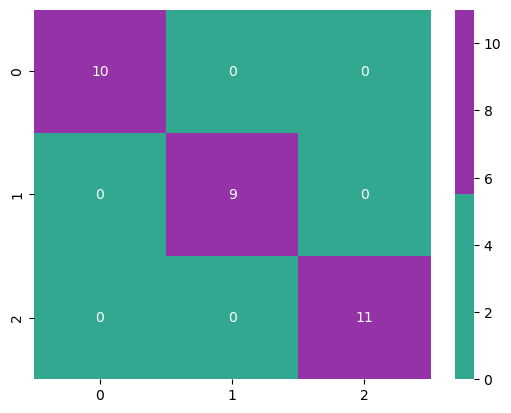

In [82]:
sns.heatmap(confusion_matrix(y_test1,y_prediction),annot=True,cmap=['#32a891','#9532a8']) 